In [1]:
path = r'C:\Users\97250\Desktop\studied\R ,python\Datasets Kaggle\VGSales.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv(path)

In [4]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
def agg(colum , c='Global_Sales',k =''):  ### c='r' will show relative data.
    
    """
    Aggregation function.
    
    Input:
        Colum - string or list of strings.
        c - string, kind of column to pick.
        k - string, kind of agg. .
        
    Return:
        DataFrame's aggregated form by given column(s).
    """
    
    #choose rank or score of happiness 
    if c == 'r':
        c='NA_Sales'
    
    a = data.groupby(colum)
    
    # These function change due to the data kind I work with.
    if k == 's':
        a = a.sum()
    else:
        a = a.mean()
        
    if type(colum) != list: # if one column has been given
        return a[c].sort_values(ascending=False)
    else:
        return a[[c]].unstack(0)
        

In [8]:
dic = {'l':(24,18),'m':(16,12),'s':(12,8)}    
  
def saver(st):
    plt.savefig(r'C:\Users\97250\Desktop\studied\R ,python\Datasets Kaggle\Outputs data\VideoGame_sales\'' + st + '.png')
 

In [9]:
         
# visual plots 
def show(data,s = 'm',st='',save=False):
    """
    Plots Bar chart.
    input:
        data - DataFrame.
        st   - string - what to print in title.
        s    - string - Output size.
    """
    
    scale = dic[s]
    
    if len(data.shape)==2 or data.index.name.lower() in ['Year','month','date']:  #line plot
        data.plot(kind = 'line', lw = (scale[0]//4),figsize = scale,fontsize = scale[0]+4)
    else:                     #bar plot
        data.plot(kind = 'bar',color = 'gold'      ,figsize = scale,fontsize = scale[0]+4)
    
    plt.title("\n " + st + ": \n",fontsize = 2*scale[0])
    plt.legend(loc='upper right',prop={'size':1.2*scale[0]})    
    if save:
        saver(st)

In [10]:
# heatmap function
def heat(data,s='m',st='',save=False):
    
    scale = dic[s]
    
    sns.set(font_scale = 1.8)
    plt.figure(figsize = scale)
    sns.heatmap(data = data ,lw=1 ,linecolor = 'white',cmap = 'Reds', annot = True)
    plt.title('\n'+ st +': \n',fontsize = 2*scale[0])
    if save :
        saver(st)

In [11]:
def aggplot(colum , c='Global_Sales',k ='sum',size = 'm',title='',save=False):  ### c='r' will show relative data.
    
    """
    Aggregation annd plot function.
    
    Input:
        Colum: string or list of strings.- columns to aggregate with.
        c: string, kind of column to agg. on . 
        k: string, kind of agg- sum/mean.
        size: char['s','m','l']  -scale of output
        title: string -title to print
        save: bool - wether to save picture
        
    Return:
        DataFrame's aggregated column(c).
    """
    
    #choose rank or score of happiness 
    if c == 'r':
        c='NA_Sales'
    
    a = data.groupby(colum)
   
    # These function change due to the data kind I work with.
    a = a.sum() if k=='sum' else a.mean() if k=='mean' else a.var()
        
    if colum in ['Year','month','date']:  # if the check is time modified
        return showTime(data = a[c]    ,s = size, st= k+' of '+title ,save=save)
        
    if type(colum) != list: # if one column has been given
        return show(data = a[c].sort_values(ascending=False)      ,s = size, st= k+' of '+title ,save=save) #inherits params to show()
    
    else: # tow dimentional data or more.
        x = input('Sir, to unstack?  (y/n)')
        if x == 'y':
            return heat(data = a[c].unstack(0)                   ,s = size, st = k+' of '+title ,save=save)#inherits params to heat()
        elif x =='n': 
            return a[[c]].sort_values(ascending = False,by = c)
                
            
            
            

In [12]:
data.groupby('Genre').sum()['Global_Sales']

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

In [58]:
def topCountries(top=10):
    
    """
    This func return data for top countries throughout time.
    """
    
    #top 10 deadly countries
    countries = agg('country')[:top].index
    #grab aggregated data for these countries
    dataOfTop10 = agg(['country']).query("country in @countries")
    #unstack data
    dataOfTop10 = dataOfTop10.unstack(1)
    #remove multiindexes
    dataOfTop10 = dataOfTop10.transpose().reset_index(level=0, drop=True).transpose()
    #sort by year
    dataOfTop10.sort_index(inplace=True)
    return dataOfTop10

In [104]:

###what happens if i normalize data and run corr() from sklearn
###Will the corr now will be not affected by scale??

###correlatio Sales
data.corr()['Global_Sales'][['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]

NA_Sales       0.941047
EU_Sales       0.902836
JP_Sales       0.611816
Other_Sales    0.748331
Name: Global_Sales, dtype: float64

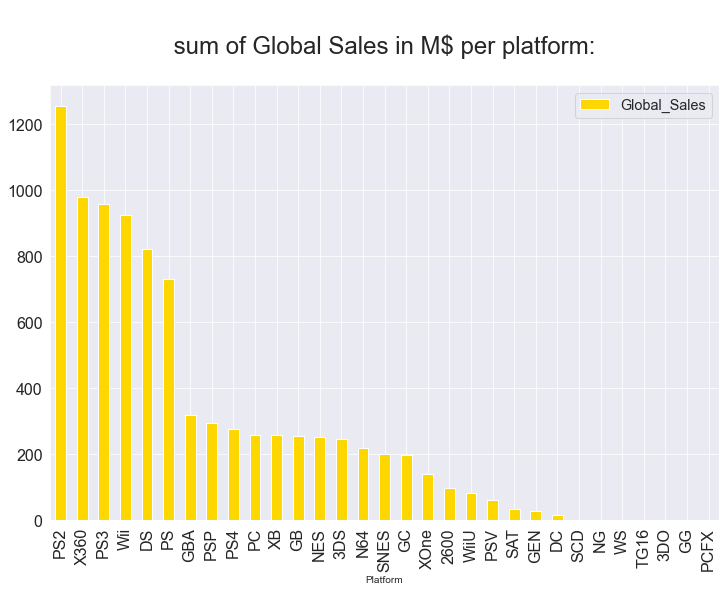

In [13]:
### most saled platform
aggplot('Platform', c='Global_Sales', k='sum', size='s', title='Global Sales in M$ per platform', save=False)

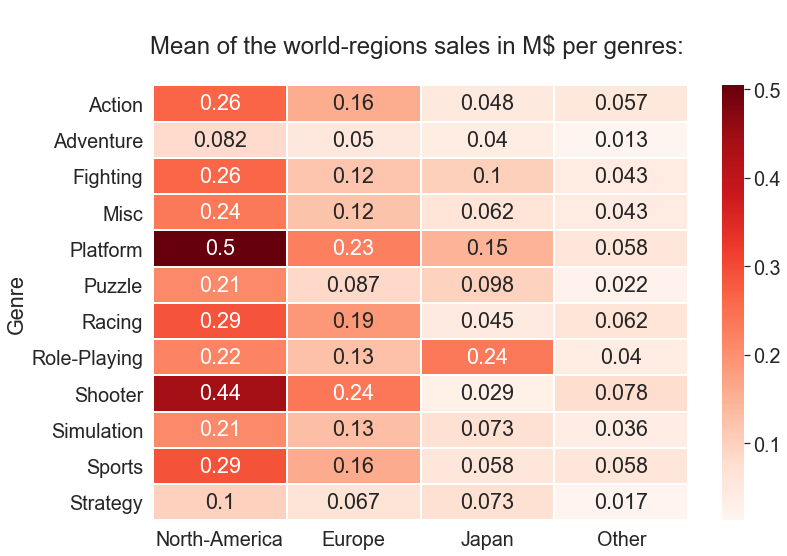

In [113]:
#heatmaps
x = data.groupby('Genre').mean()[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
x.columns = 'North-America Europe Japan Other'.split()
heat(x,s='s', st='Mean of the world-regions sales in M$ per genres', save=True)

In [14]:
#most common publishers

def topPublishers(top=20):
    
    """
    This func return data for top Publisher throughout time.
    """
    
    #top 10 deadly countries
    Publishers = data.groupby('Publisher').sum()['Global_Sales'][:top].index
    #grab aggregated data for these Publishers
    dataOfTop10 = data.query("Publisher in @Publishers")
    #agg
    dataOfTop10 = dataOfTop10.groupby('Publisher').sum()[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
    
    return dataOfTop10



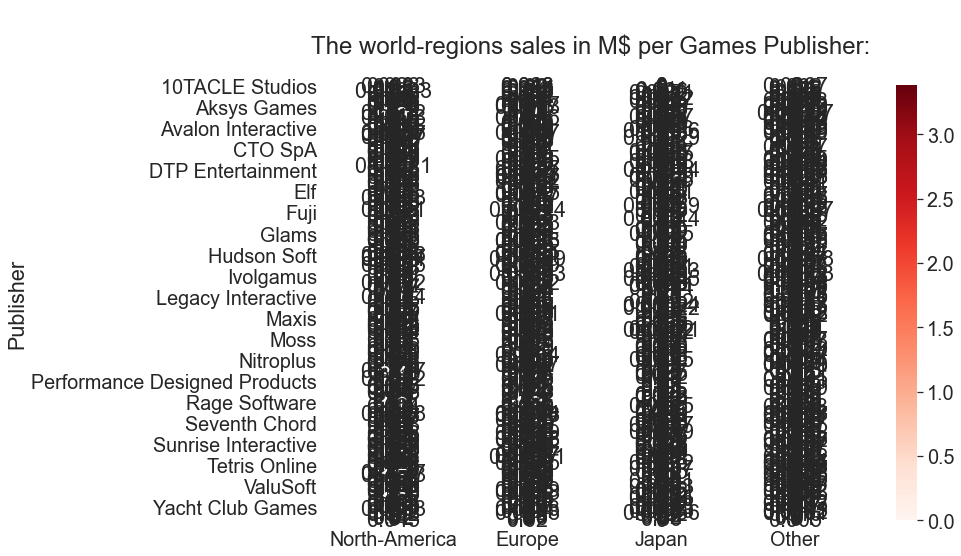

In [15]:
#heatmaps
x = data.groupby('Publisher').mean()[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
x.columns = 'North-America Europe Japan Other'.split()
heat(x,s='s', st='The world-regions sales in M$ per Games Publisher', save=True)

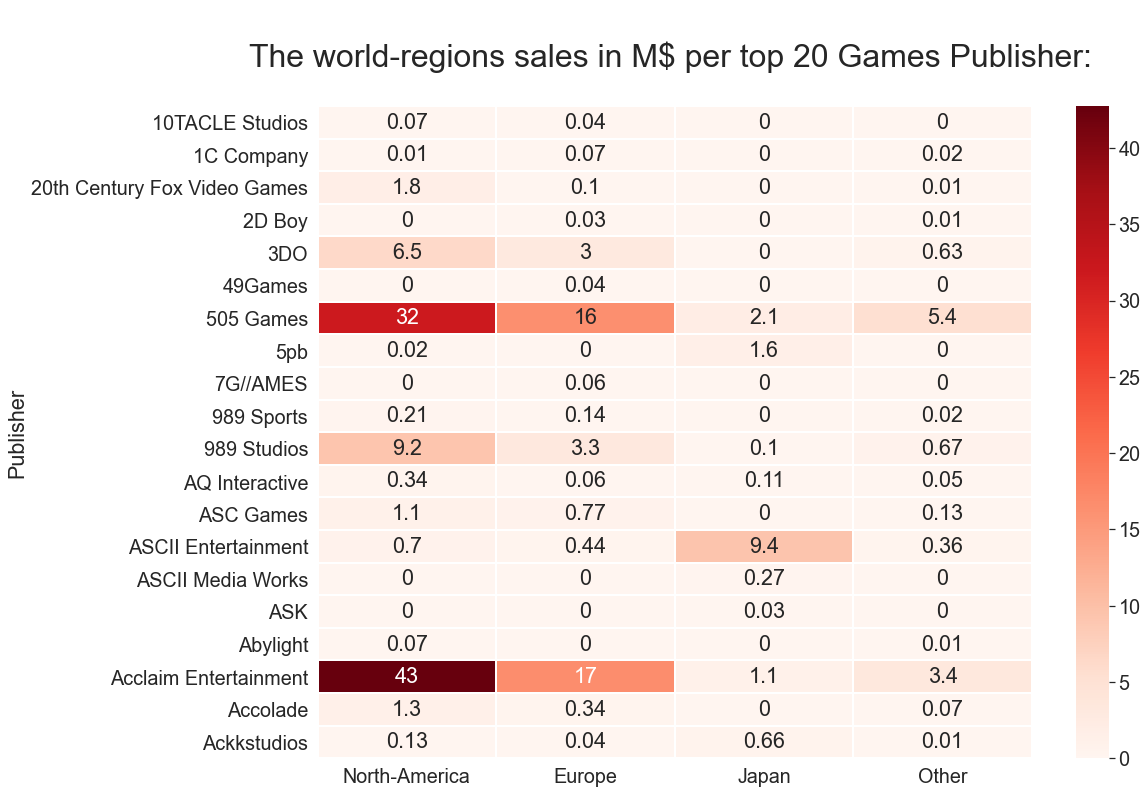

In [16]:
x = topPublishers()   #data of top 20 publishers
x.columns = 'North-America Europe Japan Other'.split()
heat(x,s='m', st='The world-regions sales in M$ per top 20 Games Publisher', save=True)

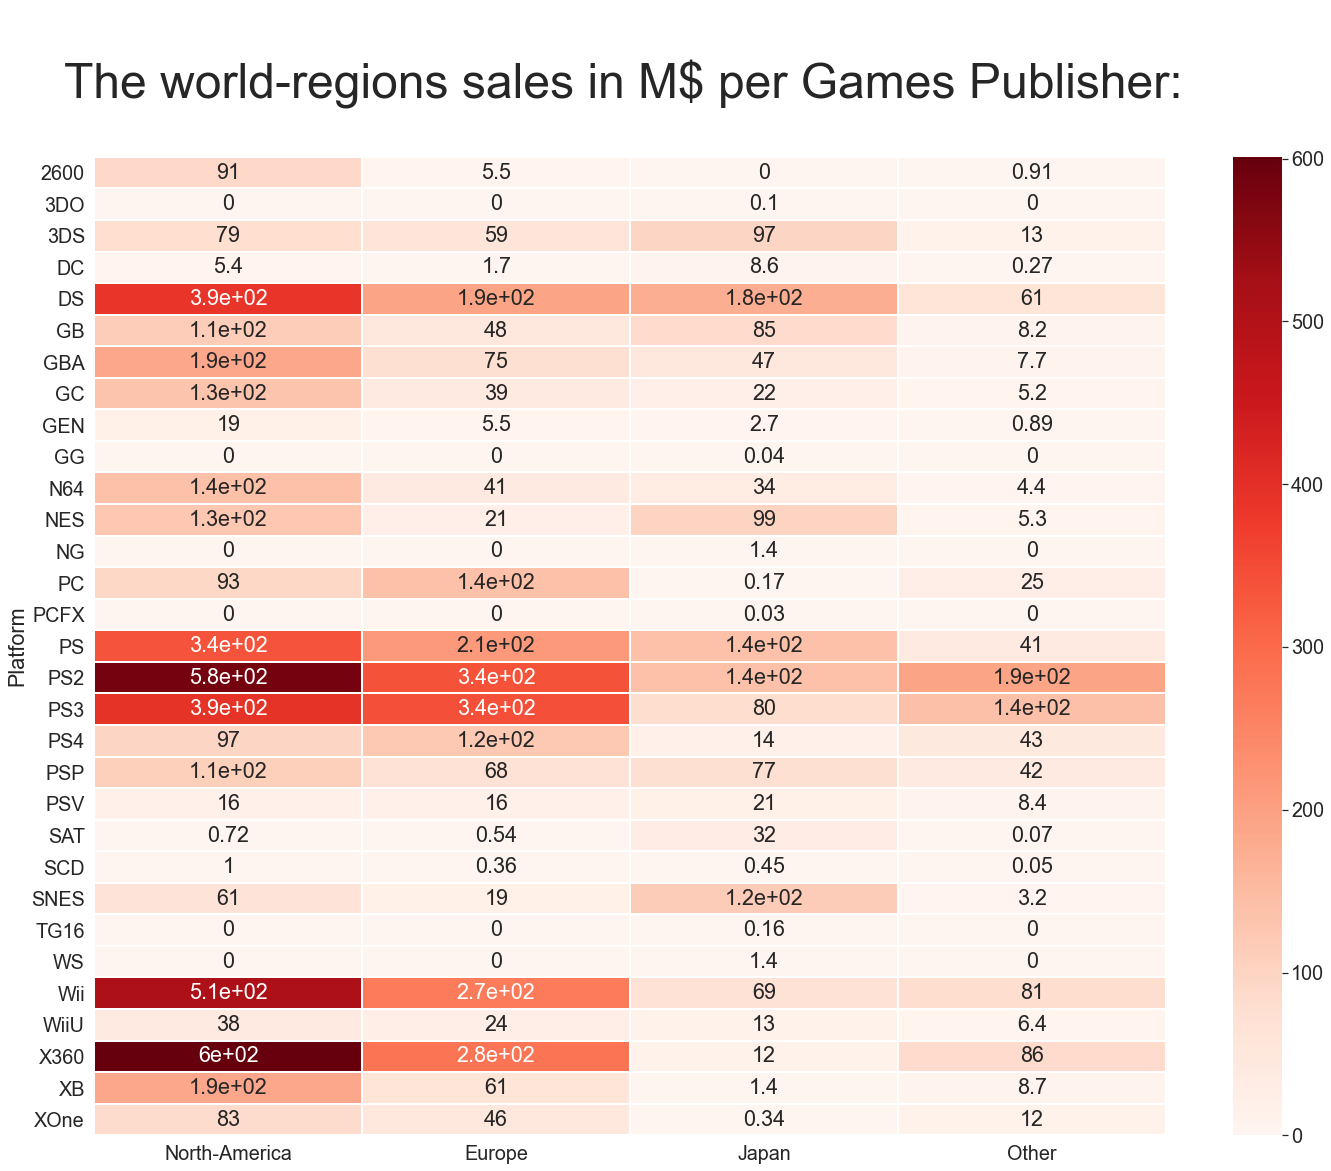

In [111]:
#heatmaps
x = data.groupby('Platform').mean()[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
x.columns = 'North-America Europe Japan Other'.split()
heat(x,s='l', st='The world-regions sales in M$ per Games Publisher', save=True)

In [17]:
# year data
        
# visual plots 
def showTime(data,s = 'm',st='',save=False):
    """
    Plots Bar chart.
    input:
        data - DataFrame.
        st   - string - what to print in title.
        s    - string - Output size.
    """
    
    scale = dic[s]
    data.sort_index().plot(kind = 'line',color = 'gold', lw = (scale[0]//4),figsize = scale,fontsize = scale[0]+4)
    plt.title("\n " + st + ": \n",fontsize = 2*scale[0])
    plt.legend(loc='upper right',prop={'size':1.2*scale[0]})    
    
    if save:
        saver(st)

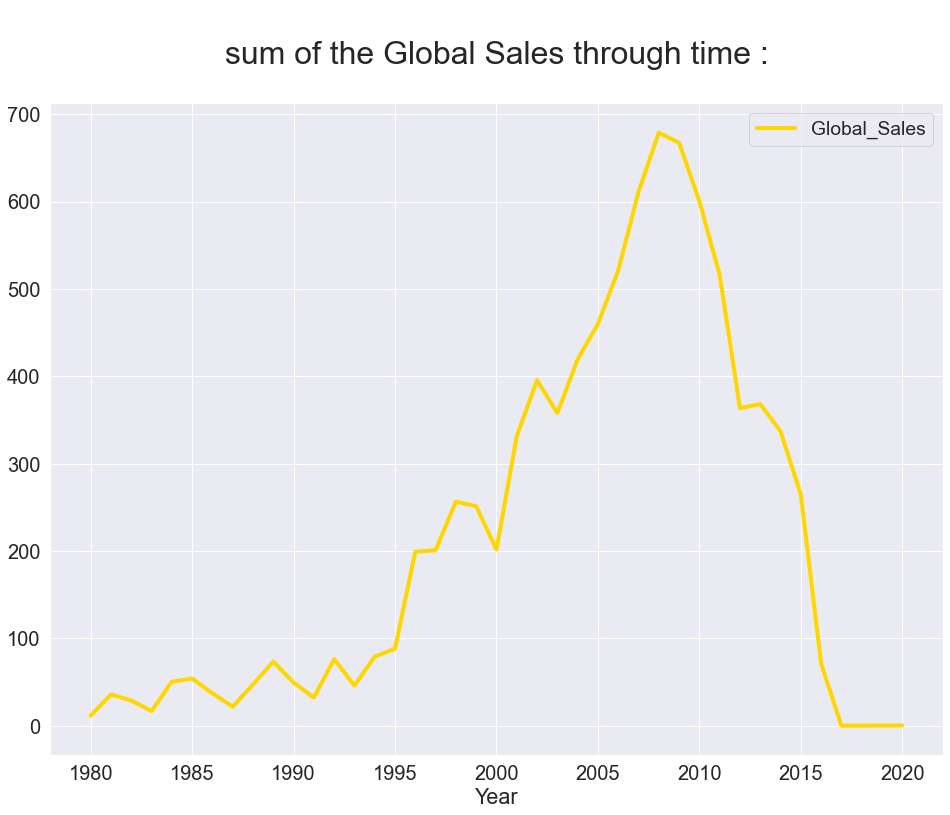

In [18]:
aggplot('Year', c='Global_Sales', k='sum', size='m', title='the Global Sales through time ', save=True)

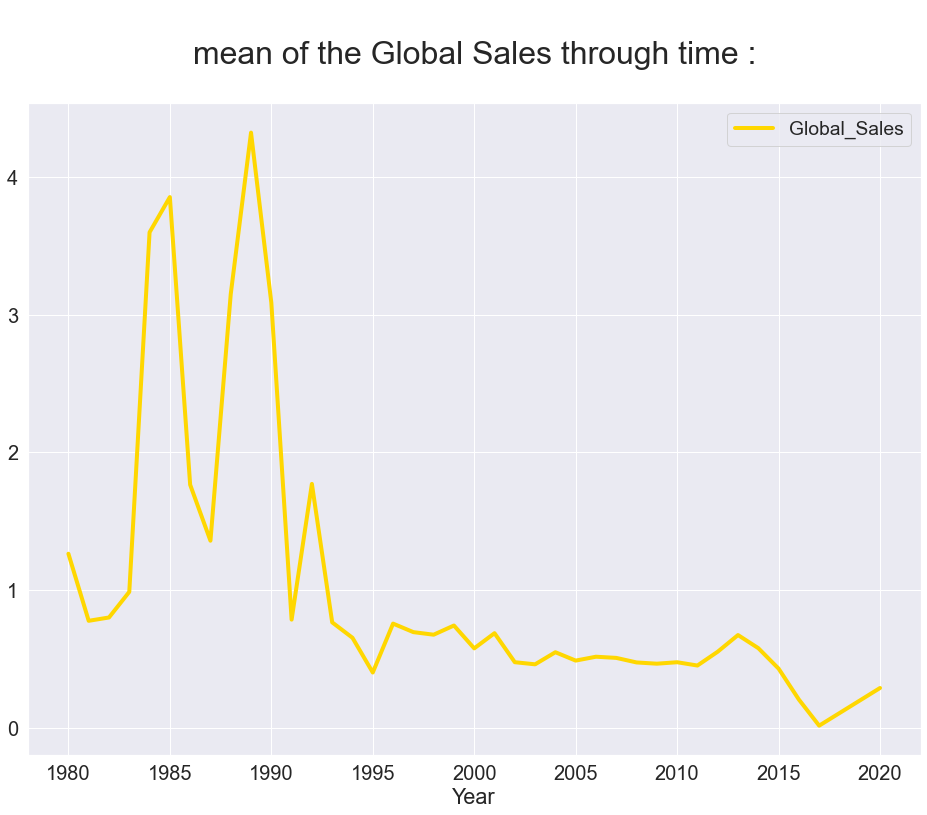

In [225]:
aggplot('Year', c='Global_Sales', k='mean', size='m', title='the Global Sales through time ', save=True)

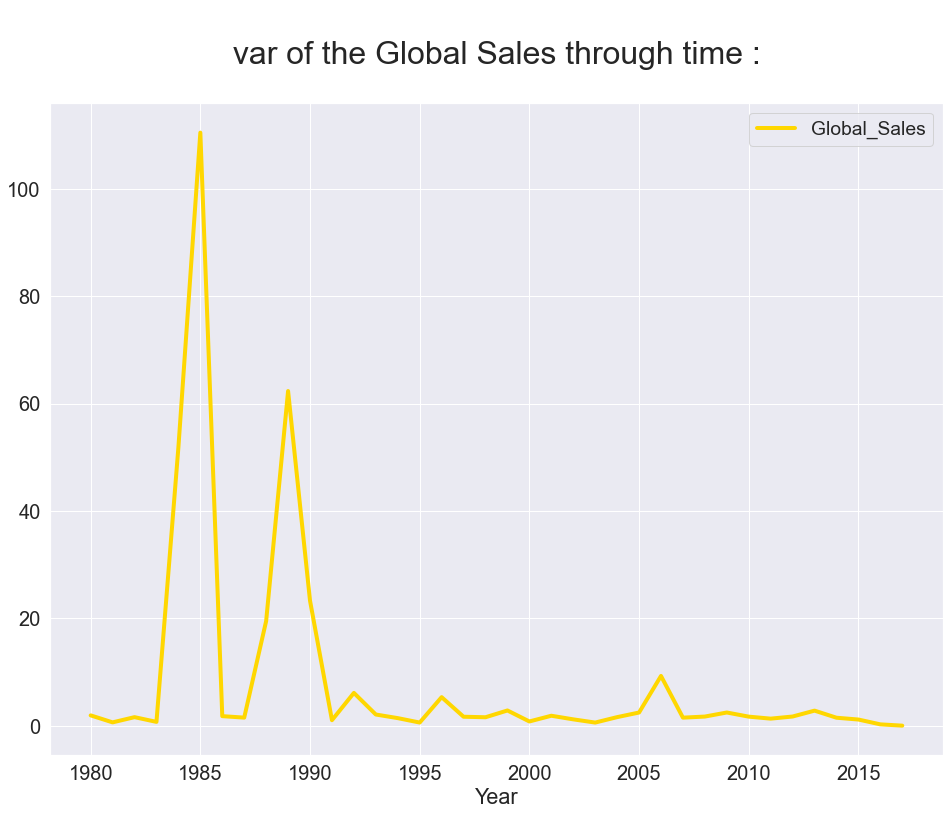

In [226]:
aggplot('Year', c='Global_Sales', k='var', size='m', title='the Global Sales through time ', save=True)

In [19]:
#find top 20 game Series along the time

In [101]:
#Best game Seriesses

topPublisherGenre = data.groupby(['Genre','Publisher']).sum()['Global_Sales'].sort_values(ascending = False).index.unique()[:20]

In [102]:
#grab aggregated data for these Publishers
dataOfTOp = data.set_index(['Genre', 'Publisher']).loc[topPublisherGenre]

In [103]:
dataOfTOp = dataOfTOp.groupby(['Genre','Publisher']).sum()['Global_Sales'].sort_values(ascending = False)

In [104]:
show(dataOfTOp)s

AttributeError: 'NoneType' object has no attribute 'lower'